In [1]:
from vipy.dataset.meva import Mevadata_Public_01
from vipy.batch import Batch
from vipy.util import flatlist, groupbyasdict
from vipy.visualize import montage

In [2]:
# http://mevadata.org/#getting-data
d = Mevadata_Public_01(videodir='/Volumes/JEBYRNE/meva/Mevadata_Public_01',  
                       repodir='/Volumes/JEBYRNE/meva/meva-data-repo')       
meva = d.MEVA(stride=20, verbose=False)
print(meva[0])

<vipy.video.scene: filename="/Volumes/JEBYRNE/meva/Mevadata_Public_01/drop-01/2018-03-07/17/2018-03-07.16-55-00.17-00-00.admin.G329.avi", fps=30.0, objects=51, activities=41>


In [3]:
# Convert videos to activity clips and select one activity clip per category
activityclips = flatlist([m.activityclip(padframes=(0,100)) for m in meva if m is not None])
d_category_to_activitylist = groupbyasdict(activityclips, lambda im: im.category())  
shortlist = [a[0] for (k,a) in d_category_to_activitylist.items()]
print(shortlist[0])

<vipy.video.scene: filename="/Volumes/JEBYRNE/meva/Mevadata_Public_01/drop-01/2018-03-07/17/2018-03-07.16-55-00.17-00-00.school.G421.avi", fps=30.0, clip=(8190,8416), category="hand_interacts_with_person", objects=2, activities=1>


In [4]:
# Interpolate every 10th frame, cropping activity (if present) and resizing to 128x128
imb = Batch(shortlist, n_processes=1).mindim(256).load()
framelist = imb.product(lambda a,k: (a[k].padcrop(a[k].boundingbox().maxsquare().dilate(1.8))
                                     if a[k].boundingbox() is not None else a[k].minsquare()) 
                                     .mindim(128).savefig(fontsize=6, nocaption=(k>0)).rgb(),
                        args=[(k,) for k in range(0,100,10)])
print(framelist[0])

<vipy.image: height=128, width=128, color=rgb>


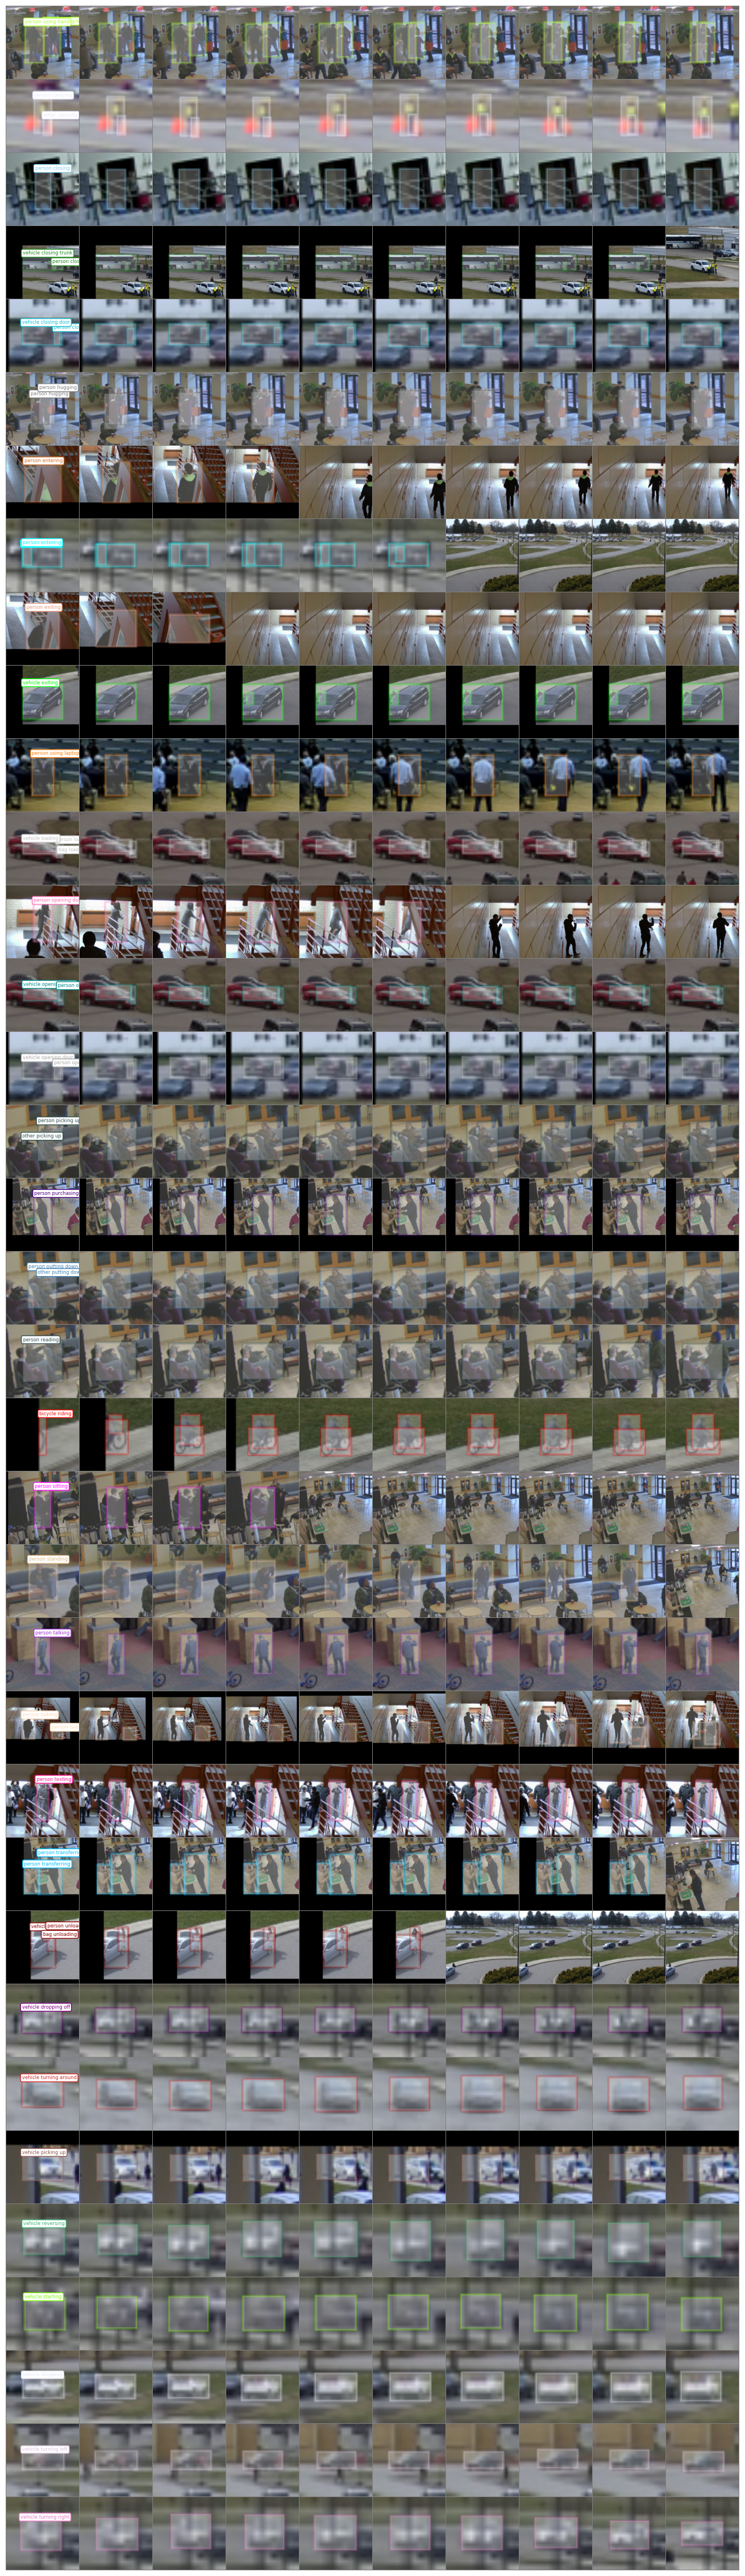

['hand_interacts_with_person', 'person_carries_heavy_object', 'person_closes_facility_door', 'person_closes_trunk', 'person_closes_vehicle_door', 'person_embraces_person', 'person_enters_scene_through_structure', 'person_enters_vehicle', 'person_exits_scene_through_structure', 'person_exits_vehicle', 'person_interacts_with_laptop', 'person_loads_vehicle', 'person_opens_facility_door', 'person_opens_trunk', 'person_opens_vehicle_door', 'person_picks_up_object', 'person_purchases', 'person_puts_down_object', 'person_reads_document', 'person_rides_bicycle', 'person_sits_down', 'person_stands_up', 'person_talks_on_phone', 'person_talks_to_person', 'person_texts_on_phone', 'person_transfers_object', 'person_unloads_vehicle', 'vehicle_drops_off_person', 'vehicle_makes_u_turn', 'vehicle_picks_up_person', 'vehicle_reverses', 'vehicle_starts', 'vehicle_stops', 'vehicle_turns_left', 'vehicle_turns_right']


In [5]:
# Display one example of each activity by row, every tenth frame by column for one hundred frames
montage(framelist, imgwidth=128, imgheight=128, 
        gridrows=len(d_category_to_activitylist), gridcols=10).show()
print([a.category() for a in imb.batch()])